# 周波数解析の簡単な理屈

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## １．理屈

***
### 【公式1】NumpyのFFT
サンプルリング周波数$H$Hzの時系列データ配列（1D-numpy配列が望ましい）で，うまく$2^n$（$n$は自然数）個の要素に切り取られた配列を`arr`とする。そのとき，Numpy関数`np.fft.fft`を用いて
```
F_arr = np.fft.fft(arr)/len(arr)
```
として得られた`F_arr`は，`arr`を離散**フーリエ変換**した配列である。ここで右辺の`F_arr`は`arr`と**同じ要素数**`len(arr)`$=2^n$の**複素数**を要素にもつ配列である。  
　　`k = 0, 1, 2, ...`に対して，`F_arr[k]`はデータ`arr`の周波数$\frac{H}{2^n}k$[Hz]のスペクトルとよばれる。なお，`F_arr[0]`は`arr`の平均値（実数）に等しく，直流成分とよばれる。
> 1. 厳密には，この時系列データは周期関数的に変動することが仮定されている。
2. `len(arr)`が$2^n$**でない**ときでも，関数`np.fft.fft`は`arr`のFFTを行う。しかし，より正確かつ高速にFFTを行うには，`len(arr)`$=2^n$であるのが望ましい（でなければならない）。
3. 離散フーリエ変換の定義の違いによって，配列`arr`の要素数`len(arr)`$=2^n$で除さないときもある。Numpyでは`len(arr)`$=2^n$で除さないものを離散フーリエ変換の定義にしていることに注意。

***
### 【公式2】Numpyの逆FFT
サンプルリング周波数$H$Hzの時系列データ配列（1D-numpy配列が望ましい）で，うまく$2^n$（$n$は自然数）個の要素に切り取られた配列を`arr`とし，`arr`公式1のようにスペクトル配列`F_arr`にスペクトル分解されていたとする。そのとき，`F_arr`は次の公式によって，元のデータ配列`arr`に戻すことができる：
```
arr = np.fft.ifft(F_arr)
```
`arr`は，`F_arr`を離散**逆フーリエ変換**した配列である。ここで右辺の`arr`は`F_arr`と**同じ要素数**`len(F_arr)`$=2^n$の**複素数**を要素にもつ配列である。  
　　データ`arr`は原信号と呼ばれ，`arr[l]`のindex `l = 0, 1, 2, ...`はサインプリング開始時刻を$0$としてそれぞれ，`t` = $0, \frac{1}{H}, \frac{2}{H}, ..., \frac{l}{H}, ..., \frac{2^n-1}{H} $[sec]である。
***

## FFTの解説 
　ここではコンピュータで扱う**高速離散フーリエ変換（FFT）**の解説を行うので，時系列データの**サンプリング数（要素数）を特殊なケースの$2^n$にとる**が，一般の離散フーリエ変換（DFT）のサンプリング数は$N(>H)$でよい（$H$はサンプリング周波数）。また，有名なオイラーの公式：$e^{i\theta}=\cos\theta+i\sin\theta$（ここで，$i=\sqrt{-1}$）を用いるが，この公式ぐらい暗記しておいても損はない。また，$e^{i\theta}$の複素共役は，$\cos\theta-i\sin\theta=\cos(-\theta)+i\sin(-\theta)=e^{-i\theta}$であることも付け加えておく。  

　簡単のため，サンプリング開始時刻$t_0$を$0$とし，十分大きな$2^n$（$n$は自然数）をとって，サンプリング周波数$H$のデータの時刻$t$が，等間隔に$t$ $\simeq \{ t_0, t_1, t_2, ...,t_l,..., t_{2^n-1} \}$ $=\{ 0, t_1, t_2, ...,t_l,..., t_{2^n-1} \}$と離散化されているとする。ここで，$\tau$ $:=$ $1/H$ $=t_1-t_0$ $(=t_1-0)$ $=t_2-t_1$ $=...=t_l-t_{l-1}$ $=...=t_{2^n-1}-t_{2^n-2}$とおく。そうすると，実数データ$\xi(t)$も離散化されて，$\xi = \xi(t)$ $\simeq \{\xi(t_0), \xi(t_1), \xi(t_2), ..., \xi(t_l),...,\xi(t_{2^n-1}) \}$ $= \{\xi(0), \xi(\tau), \xi(2\tau), ..., \xi(l\tau),...,\xi((2^n-1)\tau) \}$$=:\{\xi_0, \xi_1, \xi_2, ..., \xi_l,...,\xi_{2^n-1} \}$となる。

　さて，$\xi_l\ \ (l=0,1,2,...,2^{n}-1)$は，

$$
\xi_l=F_0+F_1e^{2\pi i\frac{1l}{2^n}}+F_2e^{2\pi i\frac{2l}{2^n}}+...
+F_ke^{2\pi i\frac{kl}{2^n}}+...+F_{2^n-1}e^{2\pi i\frac{(2^n-1)l}{2^n}}
\tag{1}
=\sum_{k=0}^{2^n-1}F_ke^{2\pi i\frac{kl}{2^n}}
$$

と分解できることがわかっている。ここで，$l$はデータ番号といわれ，時刻$t_0+l\tau$データを表す添字である。この$F_k$を，データ$\xi$の周波数$\frac{H}{2^n}k(=\frac{1}{2^n \tau}k)$のスペクトルといい，$(1)$をフーリエ逆変換という。  
　$F_0$は実数で

$$F_0=\frac{1}{2^n}(\xi_0+\xi_1+\xi_2+...+\xi_{2^{n-1}}+...+\xi_{2^n-1})\\
=\frac{1}{2^n}\sum_{k=0}^{2^n-1}\xi_{k}=:a_0. \tag{2}$$

つまり$F_0=a_0$は全データの平均であり，したがって実数である。  
　$F_0$を除いた$\{F_1, F_2, ..., F_{2^n}\}$のちょうど中間に位置する$F_{2^{n-1}}(=F_{\frac{2^n}{2}})$もまた実数で，

$$F_{2^{n-1}}=\frac{1}{2^n}(\xi_0-\xi_1+\xi_2-\xi_3+...-\xi_{2^{n-1}-1}+\xi_{2^{n-1}}-\xi_{2^{n-1}+1}+...+\xi_{2^n-2}-\xi_{2^n-1})\\
=\frac{1}{2^n}\sum_{k=0}^{2^n-1}(-1)^k\xi_{k}=:a_{2^{n-1}} \tag{3}$$

で与えられる。これをスペクトルのナイキスト成分といい，このときの周波数$\frac{H}{2}=\frac{1}{2\tau}$をナイキスト周波数とよぶ。$(1)$における，$F_{2^{n-1}}=a_{2^{n-1}}$の係数は

$$
e^{2\pi i\frac{2^{n-1}l}{2^n}}=\cos(2\pi \frac{2^{n-1}l}{2^n})+i\sin(2\pi \frac{2^{n-1}l}{2^n})=\cos(\pi l)=(-1)^l \tag{4}
$$

で，これも実数である。 ここで，$\sin(\pi l)=0$に注意せよ。後の便宜のため，$(1)$における$F_{2^{n-1}}$の項を

$$
F_{2^{n-1}}e^{2\pi i\frac{2^{n-1}l}{2^n}}=a_{2^{n-1}}\cos(\pi l)
=a_{2^{n-1}}\cos(2\pi \frac{2^{n-1}l}{2^n})+ib_{2^{n-1}}\sin(2\pi \frac{2^{n-1}l}{2^n}) \tag{5}
$$

としておこう。  
　その他の$F_k$は一般的に複素数なので，

$$F_k =: a_k-ib_k \tag{6}$$ 

とおける。ここで，$a_k,\ b_k$は実数。そうすると，

$$
a_k=\frac{1}{2^n}\sum_{l=0}^{2^n-1} \xi_l \cos(\frac{2\pi kl}{2^n}),\ \ 
b_k=\frac{1}{2^n}\sum_{l=0}^{2^n-1} \xi_l \sin(\frac{2\pi kl}{2^n}) \tag{7}
$$

と書けることがわかっている。$(7)$の２つの式の右辺は気にするな。重要なのは，$0<k<2^{n-1}$で  

$$F_{2^n-k}=\overline{F_k}=a_k+ib_k \tag{8}$$

となることだ（$\cos$が偶関数，$\sin$が奇関数からこのことはほとんど自明）。ここで，記号の上に引いてあるバーは，それの複素共役を示している。$(8)$の関係式は，$(1)$の$a_0,\ a_{2^{n-1}}$の項以外の項の和が実数てあることを保証する（エルミート性）。実際，$(1)$における$F_k$の項と$F_{2^n-k}$の項の和は，

$$
F_{k}e^{2\pi i\frac{kl}{2^n}}+F_{2^n-k}e^{2\pi i\frac{(2^n-k)l}{2^n}}
=F_{k}e^{2\pi i\frac{kl}{2^n}}+\overline{F_k}e^{-2\pi i\frac{kl}{2^n}}
=F_{k}e^{2\pi i\frac{kl}{2^n}}+\overline{F_ke^{2\pi i\frac{kl}{2^n}}}\\
=2a_k\cos(\frac{2\pi kl}{2^n})+2b_k\sin(\frac{2\pi kl}{2^n}) \tag{9}
$$

となり，実数である。  
　$(2),(3),(5),(9)$から，$(1)$は

$$
\xi_l = \xi(l\tau) =\xi(t_l)
\\
$$

$$
=a_0 +
\bigr\{2a_1\cos(\frac{2\pi 1l}{2^n})+2b_1\sin(\frac{2\pi 1l}{2^n})\bigr\}+
\bigr\{2a_2\cos(\frac{2\pi 2l}{2^n})+2b_2\sin(\frac{2\pi 2l}{2^n})\bigr\}+...\\
...+\bigr\{2a_k\cos(\frac{2\pi kl}{2^n})+2b_k\sin(\frac{2\pi kl}{2^n})\bigr\}+
...+\bigr\{2a_{2^{n-1}}\cos(\frac{2\pi 2^{n-1}l}{2^n})+2b_{2^{n-1}}\sin(\frac{2\pi 2^{n-1}l}{2^n})\bigr\}\\
$$

$$
=a_0 +
\bigr\{2a_1\cos(2\pi\frac{H}{2^n}t_l)+2b_1\sin(2\pi\frac{H}{2^n}t_l)\bigr\}+
\bigr\{2a_2\cos(2\pi\frac{2H}{2^n}t_l)+2b_2\sin(2\pi\frac{2H}{2^n}t_l)\bigr\}+...\\
...+\bigr\{2a_k\cos(2\pi\frac{kH}{2^n}t_l)+2b_k\sin(2\pi\frac{kH}{2^n}t_l)\bigr\}+...\\
...+\bigr\{2a_{2^{n-1}}\cos(2\pi\frac{2^{n-1}H}{2^n}t_l)+2b_{2^{n-1}}\sin(2\pi\frac{2^{n-1}H}{2^n}t_l)\bigr\}  \tag{10}
$$

ここで，$H=1/\tau,\ l\tau=t_l\ \rightarrow \ l=Ht_l$を使った。$(10)$より，離散時系列データ$\xi$の任意の時刻$t_l$におけるデータ点$\xi_l$は，サンプリング時間における$\xi$の平均$a_0$(周波数$0$の波)と，$k=1,2,...,2^{n-1}$として，**周波数$\frac{kH}{2^n}$をもつ振幅$2a_k$の余弦波と振幅$2b_k$の正弦波の和として展開できる**ことが解った。  

　このように $F_0,F_1,...,F_{2^{n}-1}$ は，回路またはコンピュータ上で，離散データを$(1)$または$(10)$のように展開したとき，サンプリングデータの全時刻における**平均**と**取り得る周波数の余弦波と正弦波のそれぞれの振幅の$\frac{1}{2}$を複素数を用いて表すことに等しい**。式で書くと（気にするな）：

$$
F_k=\sum_{l=0}^{2^n-1}\xi_le^{2\pi i\frac{k}{2^n}l}=\sum_{l=0}^{2^n-1}\xi_le^{2\pi i\frac{kH}{2^n}l\tau}
\ \ \ (k=0,1,2,...,2^n-1)\\
\mathrm{or}\\
F(\frac{kH}{2^n})=\sum_{l=0}^{2^n-1}\xi(t_l)e^{2\pi i\frac{kH}{2^n}t_l} \tag{11}.
$$

式$(11)$を高速離散フーリエ変換(FFT)という。  
　こうして，【公式１】は，要素数$2^n$のデータ`arr`について，  
 - `F_arr[0]`は`arr`の平均を与える。
 - `F_arr[1]`は周波数$\frac{H}{2^n}$の`arr`の余弦波(実数成分)の振幅の$\frac{1}{2}$と正弦波の振幅(虚数成分)の$\frac{1}{2}$を与える。
 - `F_arr[2]`は周波数$\frac{2H}{2^n}$の`arr`の余弦波(実数成分)の振幅の$\frac{1}{2}$と正弦波(虚数成分)の振幅の$\frac{1}{2}$を与える。
 - ...
 - `F_arr[` $k$ `]`は周波数$\frac{kH}{2^n}$の`arr`の余弦波(実数成分)の振幅の$\frac{1}{2}$と正弦波(虚数成分)の振幅の$\frac{1}{2}$を与える。
 - ...
 - `F_arr[` $2^{n-1}$ `]`は周波数$\frac{H}{2^{n-1}}$（**ナイキスト周波数**）の`arr`の余弦波(実数成分)の振幅の$\frac{1}{2}$と正弦波(虚数成分)の振幅の$\frac{1}{2}$を与える（実際には実数成分，つまり余弦波の振幅しかない）。
 - これ以降は`F_arr[` $2^{n-1}-1$ `]`, ... , `F_arr[1]`の複素共役である。  
余弦波
　データの$\{\xi_l\}$の各$F_k$の絶対値の２乗  
 
$$
P_k=\mid F_k \mid ^2 \tag{12}
$$

を周波数$\frac{kl}{2^n}$の**パワー(Power)**という。これは，データ$\{\xi_l\}$をスペクトル分解したときの周波数$\frac{kl}{2^n}$の強度を表す。
 ***

◼️2-1. サンプリング周波数1000Hzの与えられた（$2^n$個が望ましい）のデータ数の取りうる全てのFFT周波数の配列を求める関数`hz_vecor`を定義する：

In [4]:
def hz_vector(var, samp_hz=1000):
    '''
    Return (デフォルトサンプリング周波数を1000Hzのときの)FFT周波数.
    
    Parameters
    ----------
    var : int, list or np.ndarray
        データ数, リスト型データまたはNumpy配列データ. 
    samp_hz : int (1000)
        サンプリング周波数でデフォルトで1000Hz.
    '''
    if type(var)==int:
        return samp_hz * np.arange(var)/var
    elif type(var)==list or type(var)==np.ndarray:
        return samp_hz * np.arange(len(var))/len(var)
    else:
        return(None)

---
#### 付録公式
```
hz_vector(var, samp_hz=1000)
```
意味：与えられたサンプリング周波数(デフォルトで1000Hz)のFFT周波数配列を返す。  
- 第１引数`var`はデータ数(`int`)または`list`型データ, `np.ndarray`型データのいずれか。
- `type(var)`が`int`型のときは，`var`で指定されたサンプリング周波数のときのFFT周波数を返す。
- `type(var)`が`list`, `np.ndarray`型のときは，`var`で指定された配列要素数のサンプリング周波数のときのFFT周波数を返す。
> オプション`samp_hz=`でサンプリング周波数を変更できる。
***

◼️1-2. サンプリング周波数1秒以上の適切なサンプリング時間[ms]を表にしてみよう：

In [5]:
pd.DataFrame({
    'サンプリング周波数[Hz]':np.ones(11)*1000,
    '２の冪($n$)':np.arange(10,21), 
    'サンプリング時間($2^n$)[ms]':2**np.arange(10,21), 
    '周波数間隔[Hz]':1000/2**np.arange(10,21),
    'ナイキスト周波数の１つ前[Hz]':500-1000/2**np.arange(10,21)})

,サンプリング周波数[Hz],２の冪($n$),サンプリング時間($2^n$)[ms],周波数間隔[Hz],ナイキスト周波数の１つ前[Hz]
0,1000.0,10,1024,0.976562,499.023438
1,1000.0,11,2048,0.488281,499.511719
2,1000.0,12,4096,0.244141,499.755859
3,1000.0,13,8192,0.122070,499.877930
4,1000.0,14,16384,0.061035,499.938965
5,1000.0,15,32768,0.030518,499.969482
6,1000.0,16,65536,0.015259,499.984741
7,1000.0,17,131072,0.007629,499.992371
8,1000.0,18,262144,0.003815,499.996185
9,1000.0,19,524288,0.001907,499.998093


> 上の表のどれかのサンプリング時間を使うことにせよ。

◽︎2-3-1. 例えば，サンプリング周波数10Hzの次のような16個の要素を持つ配列`ex_arr`でスペクトル解析を行ってみる：

In [6]:
ex_arr = np.array([-0.78, -1.61, 1.071, 1.28, -0.17, 1.38, 1.29, -1.23, -0.23, 
                   1.23, -0.20, 0.79, 2.76,  0.80, -0.15, 1.36])

◽︎2-3-2. `ex_arr`グラフは，次のようになる：

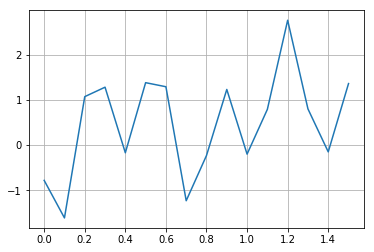

In [7]:
plt.plot(np.arange(16)/10, ex_arr)   #第１引数はサンプリング時刻
plt.grid()

◽︎2-3-3. このときのFFT周波数は：

In [8]:
ex_fft_freq = hz_vector(ex_arr, samp_hz=10)
print(ex_fft_freq)

[0.    0.625 1.25  1.875 2.5   3.125 3.75  4.375 5.    5.625 6.25  6.875
 7.5   8.125 8.75  9.375]


> ナイキスト周波数は5Hzだ。

◽︎2-3-4. `ex_arr`についてFFTをかけると：

In [9]:
F_ex_arr = np.fft.fft(ex_arr)/len(ex_arr)
print(F_ex_arr)

[ 0.4744375 +0.j         -0.05843203+0.13140334j -0.42387378+0.04421289j
 -0.02768879+0.03619817j -0.0269375 +0.025j      -0.02612358+0.64206898j
 -0.02612622+0.01058789j -0.0252556 +0.00477415j -0.0255625 +0.j
 -0.0252556 -0.00477415j -0.02612622-0.01058789j -0.02612358-0.64206898j
 -0.0269375 -0.025j      -0.02768879-0.03619817j -0.42387378-0.04421289j
 -0.05843203-0.13140334j]


> これが，`0, 0.625, 1.25, 1.875, 2.5, 3.125, 3.75, 4.375, 5.,　5.625, 6.25, 6.875, 7.5, 8.125, 8.75, 9.375Hz`の`ex_arr`のスペクトルで，`j`は$\sqrt{-1}$だ。

◽︎2-3-5. F_ex_arrにおいて，0Hzとを除いた5Hz(ナイキスト周波数)までの各成分の実数部の２倍がcos波の振幅配列，虚数部の２倍がsin波の振幅配列なので，それぞれを`A_cos`, `A_sin`とすると：

In [21]:
A_cos = np.real(F_ex_arr[1:9]) * 2
A_sin = np.imag(F_ex_arr[1:9]) * 2
print(A_cos)
print(A_sin)

[-0.11686405 -0.84774756 -0.05537758 -0.053875   -0.05224716 -0.05225244
 -0.05051121 -0.051125  ]
[0.26280668 0.08842578 0.07239633 0.05       1.28413795 0.02117578
 0.0095483  0.        ]


◽︎2-3-6. `A_cos`, `A_sin`をプロットすると（0Hzを除く）：

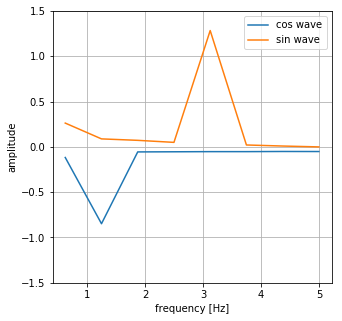

In [16]:
plt.figure(figsize=(5,5))
plt.plot(ex_fft_freq[1:9], A_cos)
plt.plot(ex_fft_freq[1:9], A_sin)
plt.legend(['cos wave', 'sin wave'])
plt.ylim([-1.5, 1.5])
plt.xlabel('frequency [Hz]')
plt.ylabel('amplitude')
plt.grid()
plt.show()

> cos波の振幅は1.25Hz, sin波の振幅は3.125Hzにピークが現れている。

◽︎2-3-7. `F_ex_arr`のパワー`P_ex_arr`は，

In [14]:
P_ex_arr = np.abs(F_ex_arr)**2
print(P_ex_arr)

[0.22509094 0.02068114 0.18162376 0.00207698 0.00135063 0.41293501
 0.00079468 0.00066064 0.00065344 0.00066064 0.00079468 0.41293501
 0.00135063 0.00207698 0.18162376 0.02068114]


◽︎2-3-8. このパワーのグラフは，次のようになる：

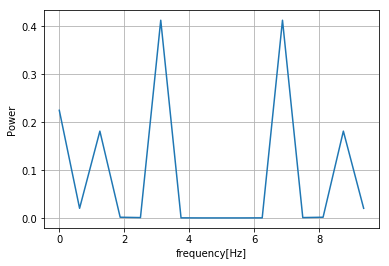

In [15]:
plt.plot(hz_vector(ex_arr, samp_hz=10), P_ex_arr)
plt.xlabel('frequency[Hz]')
plt.ylabel('Power')
plt.grid()

> スペクトル強度のピークは3.125Hz，次のピークは1.25Hzのところにある。
>> ナイキスト周波数(5Hz)を境として，それより大きいの周波数帯のパワーは無視してよい。なぜなら，後半の前半の0Hzのところを除いた周波数帯のパワーの折り返しだからである。